In [3]:
import pandas as pd

In [4]:
path = "D:/Desktop Backup/Python_Practice/Project4/angel_one-pricedata.xlsx"

In [8]:
!pip install openpyxl

  Using cached openpyxl-3.1.5-py2.py3-none-any.whl (250 kB)
  Using cached et_xmlfile-1.1.0-py3-none-any.whl (4.7 kB)


You should consider upgrading via the 'c:\users\amit.ranjan\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [9]:
df = pd.read_excel(path)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495 entries, 0 to 494
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   CAPITALINE CODE          495 non-null    int64         
 1   CO_NAME                  495 non-null    object        
 2   [Date                    495 non-null    datetime64[ns]
 3   [Open Price              495 non-null    float64       
 4   [High Price              495 non-null    float64       
 5   [Low Price               495 non-null    float64       
 6   [Close Price             495 non-null    float64       
 7   [Total Volume(Adjusted)  495 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(2), object(1)
memory usage: 31.1+ KB


In [12]:
df.drop("CAPITALINE CODE", axis=1, inplace= True)

In [14]:
new_column_names = {'CO_NAME': 'Co_name','[Date': 'Date','[Open Price':'Open_price','[High Price': 'high_price','[Low Price':'low_price',
 '[Close Price': 'Close_price','[Total Volume(Adjusted)]': 'Volumes'}

In [15]:
df.rename(columns = new_column_names, inplace= True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495 entries, 0 to 494
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Co_name                  495 non-null    object        
 1   Date                     495 non-null    datetime64[ns]
 2   Open_price               495 non-null    float64       
 3   high_price               495 non-null    float64       
 4   low_price                495 non-null    float64       
 5   Close_price              495 non-null    float64       
 6   [Total Volume(Adjusted)  495 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 27.2+ KB


In [18]:
!pip install pandas_ta

You should consider upgrading via the 'c:\users\amit.ranjan\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [59]:
import pandas_ta as ta
df['emafast'] = df.ta.ema(length=5)
df['emaslow'] = df.ta.ema(length=145)

In [60]:
def TotalSignal(df, emafast, emaslow):
    df['TotalSignal'] = 0
    for row in range(1, len(df)):
        if (emafast[row-1]<= emaslow[row-1]) and (emafast[row]> emaslow[row]):
            df.at[row,'TotalSignal'] = 2 # bullish
        elif (emafast[row-1] >= emaslow[row-1]) and (emafast[row]> emaslow[row]):
            df.at[row,'TotalSignal'] = 1 #bearish
    return df


TotalSignal(df,emafast=df['emafast'], emaslow=df['emaslow'])

,Co_name,Date,Open_price,high_price,low_price,Close_price,[Total Volume(Adjusted),emafast,emaslow,TotalSignal,pointposbreak
0,Angel One,2022-07-04,1218.00,1275.00,1216.75,1264.30,63487,NaN,NaN,0,NaN
1,Angel One,2022-07-05,1276.00,1303.75,1252.00,1256.35,65546,NaN,NaN,0,NaN
2,Angel One,2022-07-06,1265.00,1274.45,1222.45,1249.45,25275,NaN,NaN,0,NaN
3,Angel One,2022-07-07,1270.00,1310.00,1248.00,1298.95,64640,NaN,NaN,0,NaN
4,Angel One,2022-07-08,1315.00,1322.70,1285.30,1289.90,22783,1271.790000,NaN,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
490,Angel One,2024-06-26,2563.00,2619.40,2539.45,2598.35,9994,2589.232354,2688.353496,0,NaN
491,Angel One,2024-06-27,2600.00,2655.90,2578.00,2590.15,15060,2589.538236,2687.008242,0,NaN
492,Angel One,2024-06-28,2629.40,2648.35,2587.05,2600.00,9006,2593.025491,2685.816349,0,NaN
493,Angel One,2024-07-01,2591.35,2602.50,2531.10,2578.75,17134,2588.266994,2684.349686,0,NaN


In [61]:
import numpy as np
def pointposbreak(x):
    if x['TotalSignal']==1:
        return x['high_price']+1e-3
    elif x['TotalSignal']==2:
        return x['low_price']-1e-3
    else:
        return np.nan

df['pointposbreak'] = df.apply(lambda row: pointposbreak(row), axis=1)

In [62]:
import plotly.graph_objects as go 
from plotly.subplots import make_subplots
from datetime import datetime

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495 entries, 0 to 494
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Co_name                  495 non-null    object        
 1   Date                     495 non-null    datetime64[ns]
 2   Open_price               495 non-null    float64       
 3   high_price               495 non-null    float64       
 4   low_price                495 non-null    float64       
 5   Close_price              495 non-null    float64       
 6   [Total Volume(Adjusted)  495 non-null    int64         
 7   emafast                  491 non-null    float64       
 8   emaslow                  351 non-null    float64       
 9   TotalSignal              495 non-null    int64         
 10  pointposbreak            227 non-null    float64       
dtypes: datetime64[ns](1), float64(7), int64(2), object(1)
memory usage: 42.7+ KB


In [64]:
dfpl = df[1:]
dfpl.reset_index(inplace=True)

fig = go.Figure(data=[go.Candlestick(x=dfpl.index,
                open=dfpl['Open_price'],
                high=dfpl['high_price'],
                low=dfpl['low_price'],
                close=dfpl['Close_price'],
                increasing=dict(line=dict(color='rgba(0, 255, 0, 0.6)', width=0.1), # Red with transparency for increasing
                fillcolor='rgba(0, 255, 0, 0.6)'),  # Match fill color with line color
                decreasing=dict(line=dict(color='rgba(255, 0, 0, 0.6)', width=0.1), # Green with transparency for decreasing
                fillcolor='rgba(255, 0, 0, 0.6)')), # Match fill color with line color),
                go.Scatter(x=dfpl.index, y=dfpl.emafast, line=dict(color='yellow', width=2), name="EMAFast"),
                go.Scatter(x=dfpl.index, y=dfpl.emaslow, line=dict(color='magenta', width=2), name="EMASlow")])

In [65]:
fig.add_scatter(x=dfpl.index, y=dfpl['pointposbreak'], mode="markers",
                marker=dict(size=10, color="MediumPurple"),
                name="Signal")

In [66]:
fig.update_layout(
    width=1000,
    height=800,
    sliders=[],
    paper_bgcolor='black',  # Set the background color of the entire figure
    plot_bgcolor='black',   # Set the background color of the plotting area
    xaxis_showgrid=False,   # Remove x-axis gridlines
    yaxis_showgrid=False,   # Remove y-axis gridlines
)

fig.show()

In [69]:
dfpl = df[:].copy()

In [70]:
dfpl.rename(columns = {'Open_price': 'Open', 'high_price': 'High', 'low_price': 'Low',
                       'Close_price':'Close', '[Total Volume(Adjusted)': 'Volume'}, inplace = True)

In [71]:
from backtesting import Strategy, Backtest
import pandas_ta as ta

In [72]:
dfpl["EMAFast"] = ta.ema(dfpl["Close"], length=5)
dfpl["EMASlow"] = ta.ema(dfpl["Close"], length=20)

In [73]:
def SIGNAL():
    return dfpl.TotalSignal

In [74]:
class MyStrat(Strategy):
    fast_ema_len = 5  #class attribute
    slow_ema_len = 145
    mysize = 0.1


    def init(self):
        dfpl["EMAFast"] = ta.ema(dfpl["Close"], length=self.fast_ema_len)
        dfpl["EMASlow"] = ta.ema(dfpl["Close"], length=self.slow_ema_len)
        self.fast_ema = self.I(lambda: dfpl["EMAFast"])
        self.slow_ema = self.I(lambda: dfpl["EMASlow"])

    def next(self):
        if self.fast_ema[-1] > self.slow_ema[-1] and self.fast_ema[-2] <= self.slow_ema[-2]:
            for trade in self.trades:
                if trade.is_short:
                    trade.close()
            if len(self.trades) == 0:
                self.buy(size=self.mysize)

        elif self.fast_ema[-1] < self.slow_ema[-1] and self.fast_ema[-2] >= self.slow_ema[-2]:
            for trade in self.trades:
                if trade.is_long:
                    trade.close()
            if len(self.trades) == 0:
                self.sell(size=self.mysize)

In [75]:
bt = Backtest(dfpl, MyStrat, cash=100000, margin=1/10, commission=.000)
stats, heatmap = bt.optimize(fast_ema_len=range(5, 40, 5),
                    slow_ema_len=range(40, 150, 5),
                    maximize='Return [%]', max_tries=300,
                    random_state=0,
                    return_heatmap=True)
stats

C:\Users\Amit.Ranjan\AppData\Local\Temp\ipykernel_19292\142792886.py:1: UserWarning:

Data index is not datetime. Assuming simple periods, but `pd.DateTimeIndex` is advised.



  0%|          | 0/5 [00:00<?, ?it/s]

Start                                     0.0
End                                     494.0
Duration                                494.0
Exposure Time [%]                   57.979798
Equity Final [$]                    234846.25
Equity Peak [$]                     291148.75
Return [%]                          134.84625
Buy & Hold Return [%]               86.182077
Return (Ann.) [%]                         0.0
Volatility (Ann.) [%]                     NaN
Sharpe Ratio                              NaN
Sortino Ratio                             NaN
Calmar Ratio                              0.0
Max. Drawdown [%]                  -24.934419
Avg. Drawdown [%]                   -7.009049
Max. Drawdown Duration                  158.0
Avg. Drawdown Duration                  20.85
# Trades                                  2.0
Win Rate [%]                             50.0
Best Trade [%]                     146.966283
Worst Trade [%]                      -4.63648
Avg. Trade [%]                    

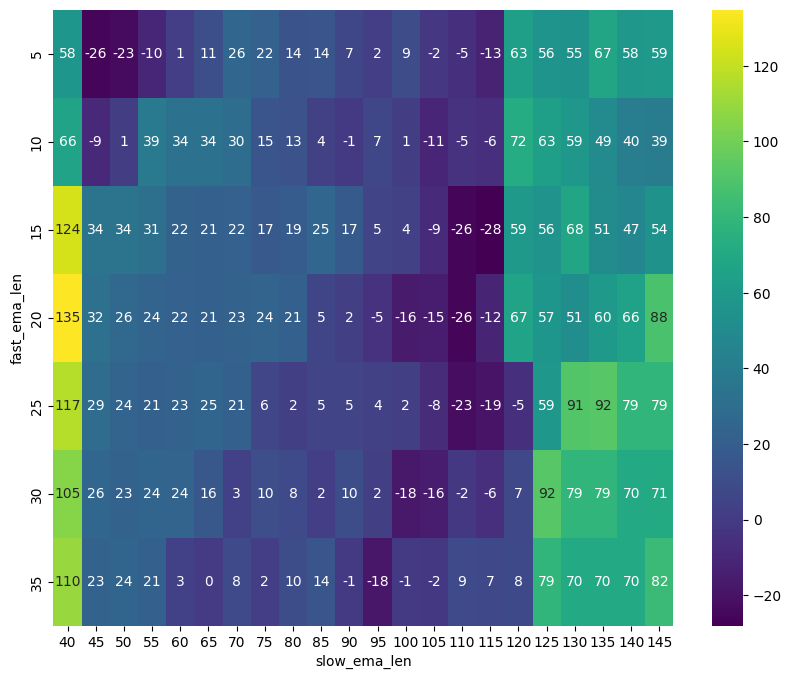

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Convert multiindex series to dataframe
heatmap_df = heatmap.unstack()
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_df, annot=True, cmap='viridis', fmt='.0f')
plt.show()